# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Average Salary by Experience Level

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'd:\\Documents\\TC Tanzila\\code Ins\\Capstone\\Global-_AI_Job_Market_Salary_Trends_2025\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'd:\\Documents\\TC Tanzila\\code Ins\\Capstone\\Global-_AI_Job_Market_Salary_Trends_2025'

In [4]:
raw_data_dir = os.path.join(current_dir, 'data/raw') #path directory

processed_data_dir = os.path.join(current_dir, 'data/clean') #path directory

# Basic Data Visualization 

## Import Libraries and Packages

Loading Python packages that we will be using in this project to carry out the analysis. For example Numpy to compute numerical operations and handle arrays, Pandas for data manipulation and analysis, Matplotlib, Seaborn and Plotly to create different data visualisations, SciPy for optimization, linear algebra, integration etc, sklearn for machine learning.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import f_oneway, ttest_ind, kruskal
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency, kurtosis, skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Load Cleaned Data

Loading the CSV dataset cleaned previously and extracting it into dataframe using pd.read_csv() function

In [6]:
# Load cleaned dataset using the existing processed_data_dir
df= pd.read_csv(os.path.join(processed_data_dir, 'ai_job_dataset_cleaned.csv'))
df.head()

,job_id,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5,Smart Analytics
1,AI00002,AI Software Engineer,61895,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5,TechCorp Inc
2,AI00003,AI Specialist,152626,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9,Autonomous Tech
3,AI00004,NLP Engineer,80215,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8,Future Systems
4,AI00005,AI Consultant,54624,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6,Advanced Robotics


---

# Hypothesis Testing

---

## Hypothesis 1 - AI job salaries have grown significantly year-over-year.

**Explanation:** As AI technologies become more integral to various industries, the demand for skilled AI professionals is expected to rise, leading to higher salaries.

**Method:** 
- Conduct a time series analysis of AI job salaries over the past few years. Use statistical tests to determine if the year-over-year growth in salaries is significant.
- Extract the year from the job posting date and group the data by year to calculate the average salary for each year.
- Perform a linear regression analysis with year as the independent variable and average salary as the dependent variable to assess the trend over time.

**Validation:** 
- Visualize the trend using line plots to illustrate salary growth over time.
- Perform a linear regression analysis to quantify the growth rate and assess its significance.
- Upward slope and statistically significant positive trend (P< 0.05) would support the hypothesis.

### Quick growth summary

In [33]:
growth = ((115977.999727 - 115145.355983) / 115145.355983) * 100
print(f"Year-over-Year Salary Growth: {growth:.2f}%")

Year-over-Year Salary Growth: 0.72%


### Visualize the trend

   year     avg_salary
0  2024  115145.355983
1  2025  115977.999727


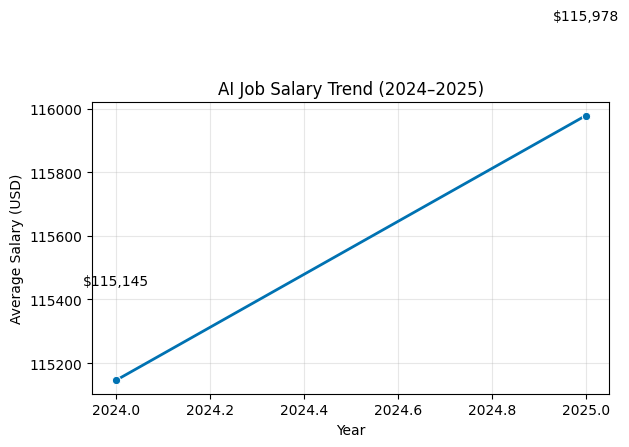

In [32]:
# extract year from the 'date' column
df['year'] = pd.to_datetime(df['posting_date']).dt.year 
df['year'].value_counts().sort_index()

# Compute average salary per year
avg_salary_by_year = df.groupby('year')['salary_usd'].mean().reset_index()
avg_salary_by_year.columns = ['year', 'avg_salary']
print(avg_salary_by_year)

# Plotting the trend of average salary over the years
sns.lineplot(
    data=avg_salary_by_year,
    x='year',
    y='avg_salary',
    marker='o',
    color='#0072B2',
    linewidth=2
)

for i, val in enumerate(avg_salary_by_year['avg_salary']):
    plt.text(avg_salary_by_year['year'][i], val + 300, f"${val:,.0f}", ha='center')

plt.title('AI Job Salary Trend (2024–2025)')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Limitations and Considerations
- with only a few years of data, it may be challenging to establish a robust trend. A reliable regression analysis or t- test typically requires at least 5-10 years of data to account for variability and ensure statistical significance.
- the observed  change is +0.7% per year, which is relatively modest. While this indicates a positive trend, it may not be substantial enough to draw strong conclusions about significant growth in AI job salaries, but additional years of data may help to establish a more definitive trend.

# Hypothesis 2 - Some AI roles have fasrter salary growth than others.

**Explanation:**

 Different AI roles may experience varying levels of demand and specialization, leading to differential salary growth rates. 

**Method:**
- Categorize the job postings by role (e.g., Data Scientist, Machine Learning Engineer, AI Researcher, etc.).
- Calculate the average salary for each role over the years.
- Perform a comparative analysis to identify which roles have experienced the highest salary growth rates.

**Validation:**
- Use bar charts or line plots to visualize salary growth trends for different roles.
- Conduct ANOVA or similar statistical tests to determine if the differences in salary growth rates among roles are statistically significant.
- Significant differences in growth rates among roles would support the hypothesis.

In [38]:
# Compute average salary by job title and year
avg_salary_by_role = (
    df.groupby(['job_title', 'year'])['salary_usd']
    .mean()
    .reset_index().round(2)
)
avg_salary_by_role.head()

,job_title,year,salary_usd
0,AI Architect,2024,117231.61
1,AI Architect,2025,118134.37
2,AI Consultant,2024,113095.03
3,AI Consultant,2025,115290.15
4,AI Product Manager,2024,112609.45


# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [21]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)